# 📊 Data Science Job Market Analysis

**Objective:** Load, clean, explore and export job salary data to prepare for Tableau dashboard.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load data
df = pd.read_csv('DataScience_salaries_2024.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [13]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [14]:
# Feature engineering
df['job_level'] = df['experience_level'].map({'EN': 'Entry', 'MI': 'Mid', 'SE': 'Senior', 'EX': 'Executive'})
df['remote_type'] = df['remote_ratio'].apply(lambda x: 'Remote' if x == 100 else ('Hybrid' if x > 0 else 'Onsite'))
df['company_size_label'] = df['company_size'].map({'S': 'Small', 'M': 'Medium', 'L': 'Large'})

## 📈 Visualizations

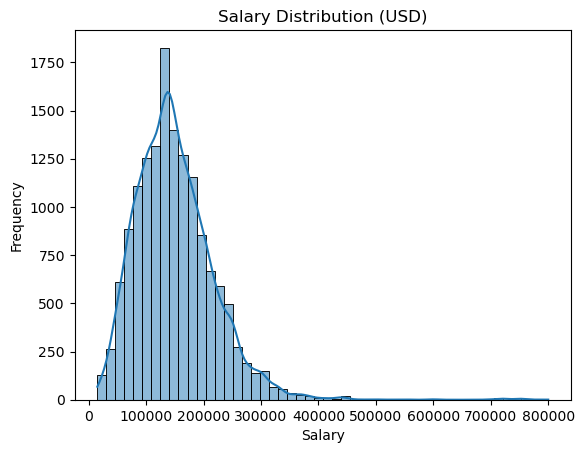

In [15]:
# Salary distribution
sns.histplot(df['salary_in_usd'], bins=50, kde=True)
plt.title('Salary Distribution (USD)')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

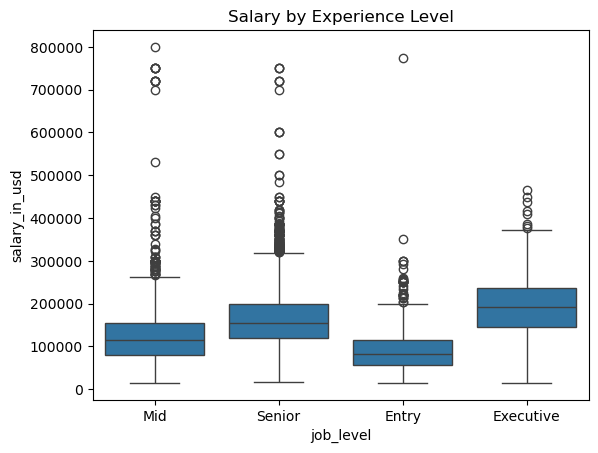

In [16]:
# Salary by experience level
sns.boxplot(data=df, x='job_level', y='salary_in_usd')
plt.title('Salary by Experience Level')
plt.show()

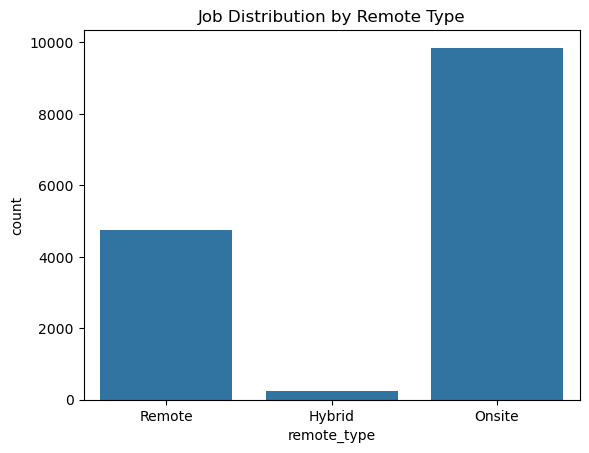

In [17]:
# Remote type distribution
sns.countplot(data=df, x='remote_type')
plt.title('Job Distribution by Remote Type')
plt.show()

In [18]:
# Export cleaned dataset
df.to_csv('cleaned_ds_jobs.csv', index=False)

Cleaned CSV saved